Fase 1: Preparación y Exploración Inicial
Revisión de los datos proporcionados

Inspecciona el archivo de datos para familiarizarte con las columnas, formato y estructura.
Carga los datos en un Jupyter Notebook utilizando Pandas.
Haz un resumen básico de las columnas (tipos de datos, valores únicos, tamaños, etc.).

Análisis Exploratorio de Datos (EDA)

Calcula estadísticas descriptivas (media, mediana, desviación estándar).
Crea visualizaciones iniciales: histogramas, gráficos de barras y boxplots para identificar patrones y posibles outliers.
Identifica distribuciones temporales si hay columnas de fechas (e.g., cuándo se realizaron adelantos o pagos).
Análisis de la Calidad de Datos 

Identifica valores faltantes, duplicados e inconsistencias.
Documenta los problemas encontrados y las estrategias de limpieza necesarias.


Fase 2: Limpieza y Preprocesamiento de los Datos
Limpieza de datos

Corrige o elimina datos faltantes, duplicados y valores fuera de rango.
Estandariza formatos de columnas clave, como fechas o categorías.
Creación de cohortes

Define cohortes basadas en la fecha del primer adelanto de efectivo. Agrúpalas según el año/mes/trimestre.


Fase 3: Análisis de Métricas
Cálculo de métricas iniciales

Frecuencia de uso del servicio: Calcula el promedio de uso por usuario y cohorte a lo largo del tiempo.
Tasa de incidentes: Determina qué porcentaje de transacciones presentan problemas por cohorte.
Ingresos generados: Agrega los ingresos por cohorte y analiza la evolución.
Métricas acumuladas: Define y calcula métricas adicionales (como ingresos acumulados por usuario).
Visualización de métricas

Crea gráficos para mostrar la evolución temporal de cada métrica en cada cohorte.
Utiliza gráficos de líneas, heatmaps o diagramas de dispersión según sea necesario.


Fase 4: Modelado Avanzado
Modelos de regresión

Diseña modelos para predecir métricas clave, como ingresos futuros o tasas de uso.
Realiza la búsqueda de hiperparámetros e interpreta los resultados.
Crea visualizaciones, como gráficos de residuos y comparaciones entre predicciones y valores reales.
Modelos de clasificación

Segmenta usuarios según patrones de comportamiento (e.g., usuarios recurrentes vs. esporádicos).
Entrena modelos para clasificar usuarios con base en métricas relevantes.


Fase 5: Documentación y Presentación
Informe del EDA y Calidad de Datos

Resume los hallazgos y acciones tomadas durante el EDA y la limpieza en formato markdown.
Informe de Insights y Modelos

Documenta los insights clave obtenidos de las métricas y el análisis de cohortes.
Explica los modelos creados, sus parámetros y la interpretación de los resultados.
Repositorio GitHub

Organiza el código, datos y documentación en un repositorio estructurado.
Crea un README con los puntos clave del análisis.
Presentación ejecutiva

Diseña una presentación corta y clara con los insights y propuestas más relevantes para los stakeholders.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#1-
import pandas as pd

# archivo cashrequest.csv
ruta_archivo = './cashrequest.csv'
datos = pd.read_csv(ruta_archivo)
# Muestra información básica sobre el DataFrame
print(datos.info())
# Estadísticas descriptivas iniciales para columnas numéricas
print(datos.describe())
# Lista de columnas del DataFrame
print(datos.columns)
# Muestra las primeras y últimas filas para inspección inicial
#print(datos.head())
#print(datos.tail())




#comprobar si la cantidad porcentual o fija de comisión depende del tipo de la misma y de la cantidad del préstamo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

In [6]:
# EDA
# Lista de columnas de fechas
columnas_fechas = [
    'created_at', 'updated_at', 'moderated_at', 
    'reimbursement_date', 'cash_request_received_date', 
    'money_back_date', 'send_at', 'reco_creation', 'reco_last_update'
]

# Conversión a datetime
for columna in columnas_fechas:
    datos[columna] = pd.to_datetime(datos[columna], errors='coerce')

# Extraemos características temporales
datos['mes_creacion'] = datos['created_at'].dt.month
datos['año_creacion'] = datos['created_at'].dt.year

# Verificamos la distribución por años y meses
print(datos['año_creacion'].value_counts())
print(datos['mes_creacion'].value_counts())

año_creacion
2020    23680
2019      290
Name: count, dtype: int64
mes_creacion
10    7725
9     4221
7     3601
8     3417
6     2615
5      837
4      473
12     289
3      244
1      223
2      184
11     141
Name: count, dtype: int64


             amount        user_id  deleted_account_id
count  23970.000000   21867.000000         2104.000000
mean      82.720818   32581.250789         9658.755228
std       26.528065   27618.565773         7972.743249
min        1.000000      34.000000           91.000000
25%       50.000000   10804.000000         3767.000000
50%      100.000000   23773.000000         6121.500000
75%      100.000000   46965.000000        16345.000000
max      200.000000  103719.000000        30445.000000


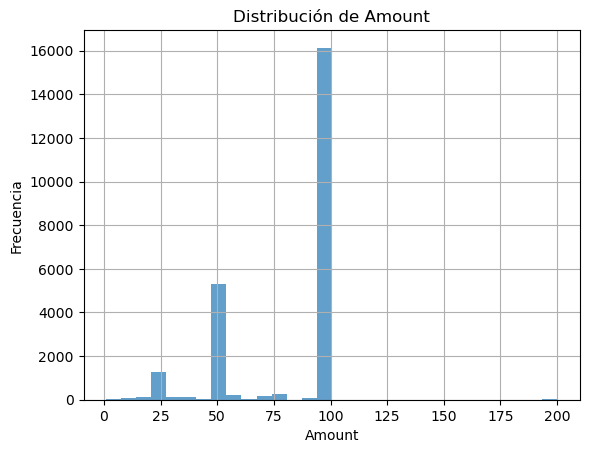

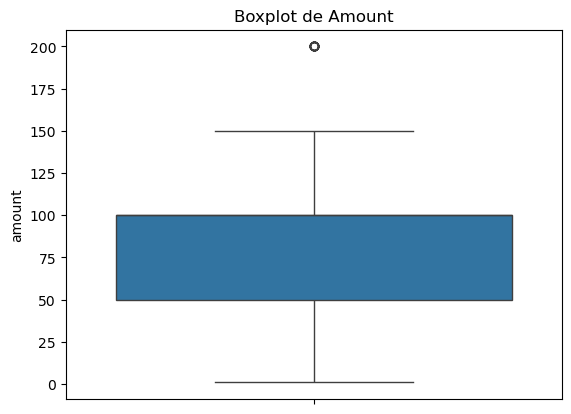

In [8]:
# Estadísticas descriptivas para columnas numéricas
print(datos[['amount', 'user_id', 'deleted_account_id']].describe())

# Histograma para 'amount'
datos['amount'].hist(bins=30, alpha=0.7)
plt.title('Distribución de Amount')
plt.xlabel('Amount')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot para identificar outliers
sns.boxplot(data=datos, y='amount')
plt.title('Boxplot de Amount')
plt.show()
#la mayoría de préstamos son de 100 pero hay uno? de 200

status
money_back               16397
rejected                  6568
direct_debit_rejected      831
active                      59
transaction_declined        48
direct_debit_sent           34
canceled                    33
Name: count, dtype: int64


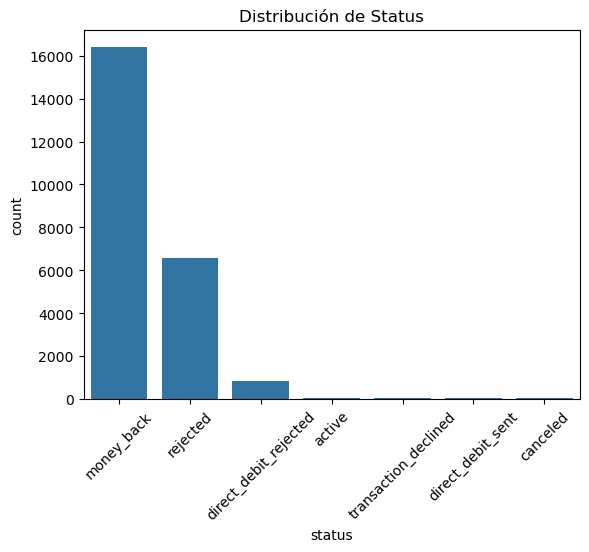

transfer_type
instant    13882
regular    10088
Name: count, dtype: int64


In [104]:
# Conteo de valores únicos para 'status'
print(datos['status'].value_counts())

# Gráfico de barras para 'status'
sns.countplot(data=datos, x='status', order=datos['status'].value_counts().index)
plt.title('Distribución de Status')
plt.xticks(rotation=45)
plt.show()

# Distribución de 'transfer_type'
print(datos['transfer_type'].value_counts())


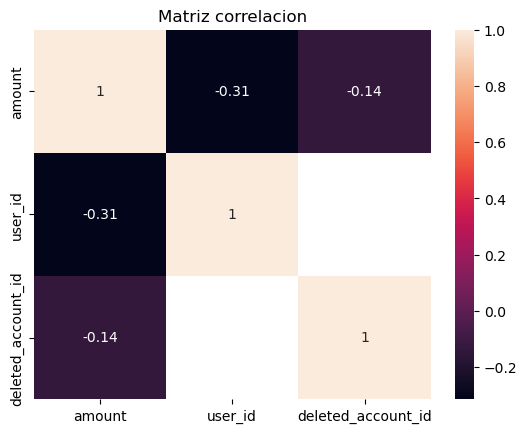

Index(['id', 'amount', 'status', 'created_at', 'updated_at', 'user_id',
       'moderated_at', 'deleted_account_id', 'reimbursement_date',
       'cash_request_received_date', 'money_back_date', 'transfer_type',
       'send_at', 'recovery_status', 'reco_creation', 'reco_last_update',
       'mes_creacion', 'año_creacion'],
      dtype='object')


In [18]:
#relacion entre variables numéricas
corr = datos[['amount', 'user_id', 'deleted_account_id']].corr()
sns.heatmap(corr,annot=True)
plt.title('Matriz correlacion')
plt.show()

print(datos.columns)

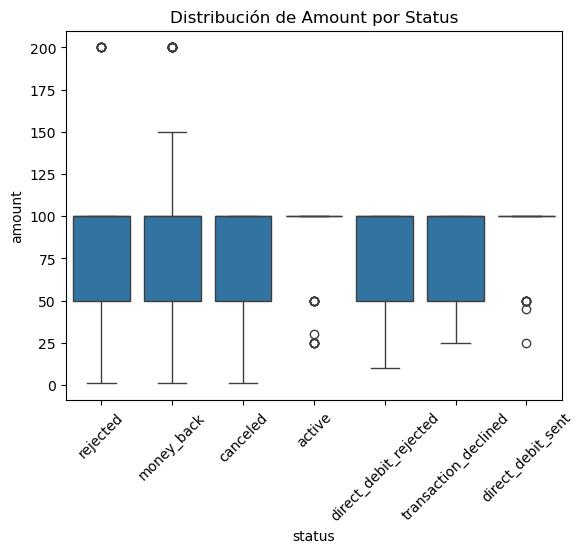

In [24]:
# Relación entre 'amount' y 'status'
sns.boxplot(data=datos, x='status', y='amount')
plt.title('Distribución de Amount por Status')
plt.xticks(rotation=45)
plt.show()


In [82]:
# Calcular el rango intercuartílico (IQR)
Q1 = datos['amount'].quantile(0.25)  # Primer cuartil
Q3 = datos['amount'].quantile(0.75)  # Tercer cuartil
IQR = Q3 - Q1  # Rango intercuartílico

# Determinar los límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar outliers
outliers = datos[(datos['amount'] < lower_bound) | (datos['amount'] > upper_bound)]

# Filtrar los datos por status
outliers_filtered = outliers[outliers['status'].isin(['rejected','money_back','canceled','active','direct_debit_rejected','transaction_declined','direct_debit_sent'])]

# Mostrar los resultados
print(outliers['status'].value_counts())
print(outliers_filtered[['amount','status']])
print(datos['status'].unique())
'''
Todos los outliers cumplen las siguientes condiciones
-el amount es 200
-El status es rejected o money_back
-el transfer type es regular
'''




status
money_back    18
rejected       7
Name: count, dtype: int64
       amount      status
467     200.0    rejected
557     200.0    rejected
727     200.0    rejected
763     200.0  money_back
980     200.0  money_back
1349    200.0    rejected
1510    200.0  money_back
2282    200.0  money_back
2332    200.0  money_back
3061    200.0    rejected
3221    200.0    rejected
3363    200.0    rejected
5530    200.0  money_back
6083    200.0  money_back
6874    200.0  money_back
6970    200.0  money_back
8333    200.0  money_back
8413    200.0  money_back
8474    200.0  money_back
10302   200.0  money_back
10418   200.0  money_back
11347   200.0  money_back
11469   200.0  money_back
13381   200.0  money_back
17144   200.0  money_back
['rejected' 'money_back' 'canceled' 'active' 'direct_debit_rejected'
 'transaction_declined' 'direct_debit_sent']


user_id  status    
3557.0   money_back    4
4297.0   money_back    4
3617.0   money_back    3
5084.0   rejected      2
9222.0   money_back    2
278.0    money_back    1
4297.0   rejected      1
4302.0   money_back    1
4843.0   rejected      1
4881.0   money_back    1
5104.0   rejected      1
5149.0   money_back    1
9282.0   money_back    1
Name: count, dtype: int64

In [62]:
#descripcion por status de los outliers
outliers.groupby('status')['amount'].describe()


,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
money_back,18.0,200.0,0.0,200.0,200.0,200.0,200.0,200.0
rejected,7.0,200.0,0.0,200.0,200.0,200.0,200.0,200.0


In [72]:
#comprobación de si hay más registros con un amount igual o mayor al de los outliers conocidos
amount_200 = datos[datos['amount'] >= 200]
print(amount_200['status'].value_counts())
#tipos de transferencia de los valores con 200 de amount(outliers)
amount_200.groupby(['status', 'transfer_type']).size()



status
money_back    18
rejected       7
Name: count, dtype: int64


status      transfer_type
money_back  regular          18
rejected    regular           7
dtype: int64

In [110]:
#outliers agrupoados por transfer_type(todos son Regular) y filtrados por user_id y status
amount_200[['created_at', 'reimbursement_date', 'cash_request_received_date']].drop_duplicates()
amount_200.groupby('transfer_type').size()
amount_200[['user_id','status']].value_counts()

user_id  status    
3557.0   money_back    4
4297.0   money_back    4
3617.0   money_back    3
5084.0   rejected      2
9222.0   money_back    2
278.0    money_back    1
4297.0   rejected      1
4302.0   money_back    1
4843.0   rejected      1
4881.0   money_back    1
5104.0   rejected      1
5149.0   money_back    1
9282.0   money_back    1
Name: count, dtype: int64

In [108]:
#creamos usuarios_outliers donde guardamos todos los user_id de los outliers y luego agrupamos por user_id y filtramos por status
usuarios_outliers = datos[datos['user_id'].isin(amount_200['user_id'].unique())]
print(usuarios_outliers.groupby('user_id')['status'].value_counts())
#hay algún user_id null, lo investigamos más adelante

user_id  status    
278.0    money_back    1
3557.0   money_back    5
3617.0   money_back    7
4297.0   money_back    6
         rejected      1
4302.0   money_back    1
4843.0   rejected      1
4881.0   money_back    1
5084.0   rejected      3
5104.0   rejected      1
5149.0   money_back    1
9222.0   money_back    3
9282.0   money_back    1
Name: count, dtype: int64


In [112]:
#mostramos las últimas 20 fechas de creación (created_at) ordenadas àra ver si hay algún patrón en las fechas o algo que nos explique el motivo 
datos[['status', 'created_at', 'amount']].sort_values(by='created_at').tail(20)


,status,created_at,amount
19027,money_back,2020-11-01 20:08:50.665552+00:00,50.0
19324,money_back,2020-11-01 20:12:26.857203+00:00,50.0
8840,money_back,2020-11-01 20:29:49.724373+00:00,100.0
10893,money_back,2020-11-01 20:31:53.965482+00:00,100.0
20828,money_back,2020-11-01 20:40:01.054577+00:00,100.0
14394,money_back,2020-11-01 20:58:06.871478+00:00,50.0
20784,money_back,2020-11-01 21:00:23.138884+00:00,100.0
21739,money_back,2020-11-01 21:12:31.454420+00:00,100.0
21792,money_back,2020-11-01 21:33:51.080334+00:00,100.0
9131,money_back,2020-11-01 21:39:43.292802+00:00,50.0


In [96]:
#comprobamos los valores nulos de los outliers

amount_200.isnull().sum()
#como nos dimos cuenta anteriormente hay 2 user_id nulos

id                             0
amount                         0
status                         0
created_at                     0
updated_at                     0
user_id                        2
moderated_at                   0
deleted_account_id            23
reimbursement_date            18
cash_request_received_date     7
money_back_date               10
transfer_type                  0
send_at                       25
recovery_status               24
reco_creation                 24
reco_last_update              24
mes_creacion                   0
año_creacion                   0
dtype: int64

In [114]:
#mostramos los user_id nulos
user_id_nulo = amount_200[amount_200['user_id'].isnull()]
print(user_id_nulo)
#vemos que ambos tienen deleted_account_id 3808, lo cual es sospechoso ya que según lexique.xlsx user_id debería reemplazarse con deleted_account_id y, además, son la misma id pese a que deberían ser únicos
#If a user delete his account, we are replacing the user_id by this id. It corresponds to a unique ID in the deleted account table with some keys information saved for fraud-fighting purposes (while respecting GDPR regulation)


        id  amount    status                       created_at  \
3221  7401   200.0  rejected 2020-07-09 21:54:35.238416+00:00   
3363  8958   200.0  rejected 2020-07-19 15:41:31.640664+00:00   

                           updated_at  user_id  \
3221 2020-07-10 06:49:22.977482+00:00      NaN   
3363 2020-07-20 13:09:32.152430+00:00      NaN   

                         moderated_at  deleted_account_id reimbursement_date  \
3221 2020-07-10 06:49:22.975185+00:00              3808.0                NaT   
3363 2020-07-20 13:09:32.149848+00:00              3808.0                NaT   

     cash_request_received_date money_back_date transfer_type send_at  \
3221                        NaT             NaT       regular     NaT   
3363                        NaT             NaT       regular     NaT   

     recovery_status reco_creation reco_last_update  mes_creacion  \
3221             NaN           NaT              NaT             7   
3363             NaN           NaT              NaT   

In [102]:
#comprobamos cuántos de los registros con 'reimbursement_date' nulo están rejected
print(amount_200[amount_200['reimbursement_date'].isnull()]['status'].value_counts())
#hay 5 rejected



status
money_back    13
rejected       5
Name: count, dtype: int64
        id  amount    status                       created_at  \
467   1140   200.0  rejected 2020-04-11 13:26:58.710517+00:00   
557    885   200.0  rejected 2020-03-15 13:45:07.357731+00:00   
727   1032   200.0  rejected 2020-04-03 06:14:19.552837+00:00   
1349  3575   200.0  rejected 2020-06-17 01:10:51.553474+00:00   
3061  8659   200.0  rejected 2020-07-17 12:57:31.472230+00:00   
3221  7401   200.0  rejected 2020-07-09 21:54:35.238416+00:00   
3363  8958   200.0  rejected 2020-07-19 15:41:31.640664+00:00   

                           updated_at  user_id  \
467  2020-04-13 08:53:52.235216+00:00   5104.0   
557  2020-03-15 16:05:00.702821+00:00   4297.0   
727  2020-04-03 09:42:05.536879+00:00   4843.0   
1349 2020-06-17 10:44:56.575810+00:00   5084.0   
3061 2020-07-17 13:28:41.736284+00:00   5084.0   
3221 2020-07-10 06:49:22.977482+00:00      NaN   
3363 2020-07-20 13:09:32.152430+00:00      NaN   

           

In [116]:
 #intentamos comprobar si hay algún patrón en los registros con el campo nulo
print(amount_200[amount_200['cash_request_received_date'].isnull()])

        id  amount    status                       created_at  \
467   1140   200.0  rejected 2020-04-11 13:26:58.710517+00:00   
557    885   200.0  rejected 2020-03-15 13:45:07.357731+00:00   
727   1032   200.0  rejected 2020-04-03 06:14:19.552837+00:00   
1349  3575   200.0  rejected 2020-06-17 01:10:51.553474+00:00   
3061  8659   200.0  rejected 2020-07-17 12:57:31.472230+00:00   
3221  7401   200.0  rejected 2020-07-09 21:54:35.238416+00:00   
3363  8958   200.0  rejected 2020-07-19 15:41:31.640664+00:00   

                           updated_at  user_id  \
467  2020-04-13 08:53:52.235216+00:00   5104.0   
557  2020-03-15 16:05:00.702821+00:00   4297.0   
727  2020-04-03 09:42:05.536879+00:00   4843.0   
1349 2020-06-17 10:44:56.575810+00:00   5084.0   
3061 2020-07-17 13:28:41.736284+00:00   5084.0   
3221 2020-07-10 06:49:22.977482+00:00      NaN   
3363 2020-07-20 13:09:32.152430+00:00      NaN   

                         moderated_at  deleted_account_id  \
467  2020-04-13 0

In [118]:
print(amount_200[amount_200['money_back_date'].isnull()]['status'].value_counts())


status
rejected      7
money_back    3
Name: count, dtype: int64


In [120]:
#Los registros con este campo nulo podrían corresponder a solicitudes que nunca se enviaron, ya sea porque fueron rechazadas (rejected) o por un error en el sistema.
print(amount_200[amount_200['send_at'].isnull()])


         id  amount      status                       created_at  \
467    1140   200.0    rejected 2020-04-11 13:26:58.710517+00:00   
557     885   200.0    rejected 2020-03-15 13:45:07.357731+00:00   
727    1032   200.0    rejected 2020-04-03 06:14:19.552837+00:00   
763    1967   200.0  money_back 2020-05-18 07:57:49.949907+00:00   
980    1732   200.0  money_back 2020-05-13 14:13:57.448290+00:00   
1349   3575   200.0    rejected 2020-06-17 01:10:51.553474+00:00   
1510   2099   200.0  money_back 2020-05-21 12:53:43.630055+00:00   
2282   1556   200.0  money_back 2020-05-05 05:17:40.784144+00:00   
2332   2184   200.0  money_back 2020-05-26 14:35:16.092311+00:00   
3061   8659   200.0    rejected 2020-07-17 12:57:31.472230+00:00   
3221   7401   200.0    rejected 2020-07-09 21:54:35.238416+00:00   
3363   8958   200.0    rejected 2020-07-19 15:41:31.640664+00:00   
5530    737   200.0  money_back 2020-02-26 18:05:27.038373+00:00   
6083    843   200.0  money_back 2020-03-11 07:23

In [122]:
#comprobamos si los registros sin datos de recovery están asociados a un único status
print(amount_200[amount_200['recovery_status'].isnull()]['status'].value_counts())


status
money_back    17
rejected       7
Name: count, dtype: int64


In [124]:
nulos_vs_no_nulos = amount_200.assign(nulos=amount_200.isnull().sum(axis=1)).groupby('status')['nulos'].mean()
print(nulos_vs_no_nulos)


status
money_back    5.722222
rejected      7.714286
Name: nulos, dtype: float64


C:\Users\chris\AppData\Local\Temp\ipykernel_33036\2816906368.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rejected_nulos['created_at'] = pd.to_datetime(rejected_nulos['created_at'])


<Axes: xlabel='created_at'>

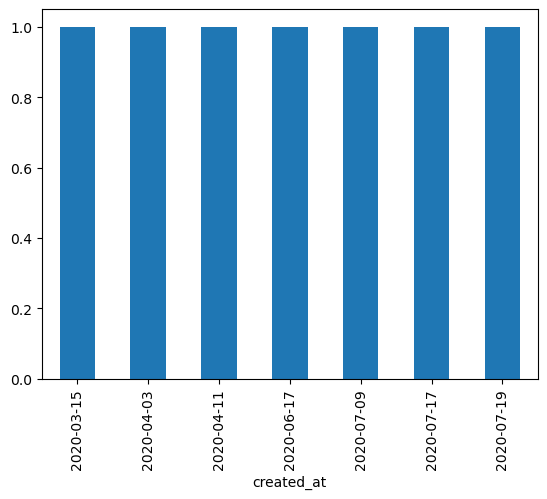

In [126]:
rejected_nulos = amount_200[amount_200['status'] == 'rejected']
rejected_nulos['created_at'] = pd.to_datetime(rejected_nulos['created_at'])
rejected_nulos['created_at'].dt.date.value_counts().sort_index().plot(kind='bar')


In [128]:
deleted_3808 = amount_200[amount_200['deleted_account_id'] == 3808]
print(deleted_3808['status'].value_counts())


status
rejected    2
Name: count, dtype: int64


Ambos registros sin user_id fueron creados en julio de 2020, lo que podría ser un indicio de un evento puntual, como una migración de datos, un fallo técnico o una campaña específica.

Puede haberse tratado de un pico de actividad en julio de 2020 que generó transacciones erróneas o incompletas.

<Axes: xlabel='mes_creacion,año_creacion'>

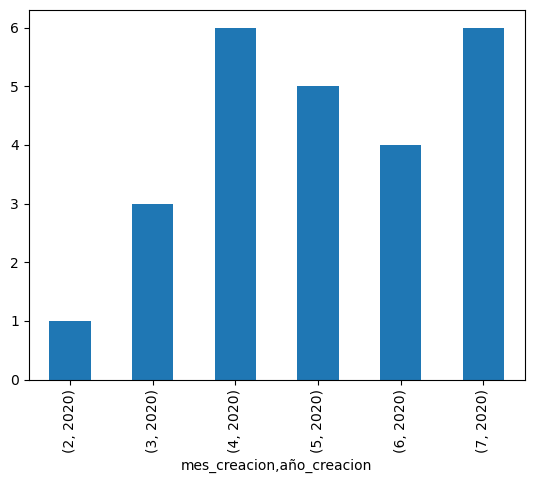

In [131]:
#comparación de volumen de transacciones en julio con otros meses
amount_200.groupby(['mes_creacion', 'año_creacion'])['id'].count().plot(kind='bar')


In [135]:
sin_recuperacion = amount_200[amount_200['recovery_status'].isnull()]
print(sin_recuperacion['status'].value_counts())



status
money_back    17
rejected       7
Name: count, dtype: int64


El valor de 200 podría estar predeterminado en el sistema como un límite de prueba o un valor estándar para ciertos procesos automatizados relacionados con devoluciones y rechazos.

In [137]:
#Analizamos otros valores atípicos (por ejemplo, fuera del rango de los percentiles 5 y 95) para ver si hay más registros con patrones similares.
# Calculamos los percentiles 5 y 95
percentil_5 = datos['amount'].quantile(0.05)
percentil_95 = datos['amount'].quantile(0.95)

# Filtramos los valores fuera del rango de los percentiles 5 y 95
outliers_percentiles = datos[(datos['amount'] < percentil_5) | (datos['amount'] > percentil_95)]

# Vemos cuántos registros fuera de los percentiles existen
print(f"Registros fuera de los percentiles 5-95: {outliers_percentiles.shape[0]}")

# Vemos los valores atípicos y sus patrones
print(outliers_percentiles[['amount', 'status', 'user_id', 'created_at']].head())



Registros fuera de los percentiles 5-95: 259
    amount    status  user_id                       created_at
10     1.0  rejected   2908.0 2020-02-08 19:20:44.627662+00:00
12     1.0  rejected    163.0 2020-02-10 13:22:10.013736+00:00
24     1.0  rejected   2460.0 2020-02-08 11:38:20.601027+00:00
45     1.0  rejected      NaN 2020-02-07 14:38:16.934291+00:00
71    20.0  rejected   2575.0 2020-03-04 13:40:10.630892+00:00


In [139]:
# Filtrar los registros con status 'rejected' y ver los valores de 'amount'
rejected_outliers = outliers_percentiles[outliers_percentiles['status'] == 'rejected']
print(rejected_outliers[['amount', 'user_id', 'created_at']])


      amount  user_id                       created_at
10       1.0   2908.0 2020-02-08 19:20:44.627662+00:00
12       1.0    163.0 2020-02-10 13:22:10.013736+00:00
24       1.0   2460.0 2020-02-08 11:38:20.601027+00:00
45       1.0      NaN 2020-02-07 14:38:16.934291+00:00
71      20.0   2575.0 2020-03-04 13:40:10.630892+00:00
73       1.0   3131.0 2020-02-08 20:29:14.009443+00:00
156      1.0   1601.0 2020-02-09 13:55:37.296777+00:00
179     10.0   1773.0 2019-12-27 21:50:43.794687+00:00
194      1.0   2481.0 2020-02-08 09:51:15.590834+00:00
233     20.0      NaN 2020-01-08 07:58:19.633889+00:00
402     20.0      NaN 2020-02-27 15:57:44.817026+00:00
467    200.0   5104.0 2020-04-11 13:26:58.710517+00:00
557    200.0   4297.0 2020-03-15 13:45:07.357731+00:00
667     10.0   3849.0 2020-03-17 12:17:44.134713+00:00
727    200.0   4843.0 2020-04-03 06:14:19.552837+00:00
834     20.0      NaN 2019-12-17 11:34:56.770131+00:00
863     20.0      NaN 2020-02-15 10:51:13.886692+00:00
1062    22

In [141]:
# Filtrar registros con user_id nulo
user_id_null = outliers_percentiles[outliers_percentiles['user_id'].isnull()]
print(user_id_null[['amount', 'status', 'created_at']])


       amount      status                       created_at
45        1.0    rejected 2020-02-07 14:38:16.934291+00:00
233      20.0    rejected 2020-01-08 07:58:19.633889+00:00
402      20.0    rejected 2020-02-27 15:57:44.817026+00:00
834      20.0    rejected 2019-12-17 11:34:56.770131+00:00
863      20.0    rejected 2020-02-15 10:51:13.886692+00:00
1163     10.0  money_back 2020-05-21 11:26:26.659202+00:00
3221    200.0    rejected 2020-07-09 21:54:35.238416+00:00
3363    200.0    rejected 2020-07-19 15:41:31.640664+00:00
4382     20.0    rejected 2020-07-30 17:24:47.251079+00:00
5358     10.0  money_back 2020-10-29 14:22:47.596398+00:00
5424      1.0    rejected 2020-02-07 18:41:59.296824+00:00
5977     10.0    rejected 2020-07-28 14:15:03.612662+00:00
7064     20.0  money_back 2019-12-26 06:42:24.865316+00:00
7797     20.0    rejected 2020-10-03 09:40:25.243787+00:00
7813     10.0    rejected 2020-06-12 06:41:08.826673+00:00
8407      1.0  money_back 2019-12-17 10:23:24.417456+00:

In [143]:
# Ver los registros con 'amount' bajo (por ejemplo, 1 o 20)
low_amount_outliers = outliers_percentiles[outliers_percentiles['amount'] <= 20]
print(low_amount_outliers[['amount', 'status', 'user_id', 'created_at']])


       amount      status  user_id                       created_at
10        1.0    rejected   2908.0 2020-02-08 19:20:44.627662+00:00
12        1.0    rejected    163.0 2020-02-10 13:22:10.013736+00:00
24        1.0    rejected   2460.0 2020-02-08 11:38:20.601027+00:00
45        1.0    rejected      NaN 2020-02-07 14:38:16.934291+00:00
71       20.0    rejected   2575.0 2020-03-04 13:40:10.630892+00:00
...       ...         ...      ...                              ...
23342    20.0  money_back  49160.0 2020-10-23 15:14:22.826136+00:00
23439    20.0  money_back      NaN 2020-10-09 18:22:29.460130+00:00
23475    20.0  money_back  89240.0 2020-10-23 18:18:23.510114+00:00
23718    20.0  money_back  35676.0 2020-08-30 09:32:13.901292+00:00
23873    20.0  money_back  34031.0 2020-08-31 15:44:19.811665+00:00

[230 rows x 4 columns]


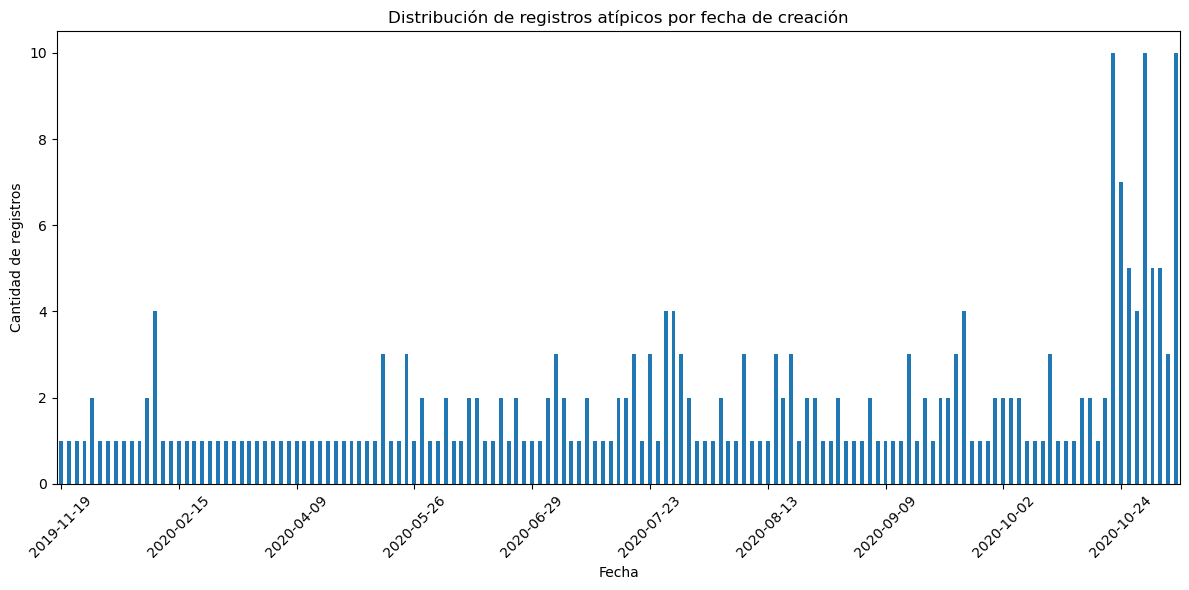

In [165]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

# Aseguramos que 'created_at' sea de tipo datetime
outliers_percentiles.loc[:, 'created_at'] = pd.to_datetime(outliers_percentiles['created_at'])

# Agrupar y contar la cantidad de registros por fecha de creación
outliers_percentiles.groupby(outliers_percentiles['created_at'].dt.date)['amount'].count().plot(kind='bar', figsize=(12, 6))

# Ajustar el eje X para mejorar la visibilidad de las fechas
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=10))  # Ajusta el número de barras de fechas
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Formato compacto para las fechas
plt.xticks(rotation=45)  # Rota las etiquetas de las fechas para evitar solapamientos

# Agregar título y etiquetas
plt.title('Distribución de registros atípicos por fecha de creación')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de registros')

# Mostrar el gráfico con un buen ajuste
plt.tight_layout()
plt.show()


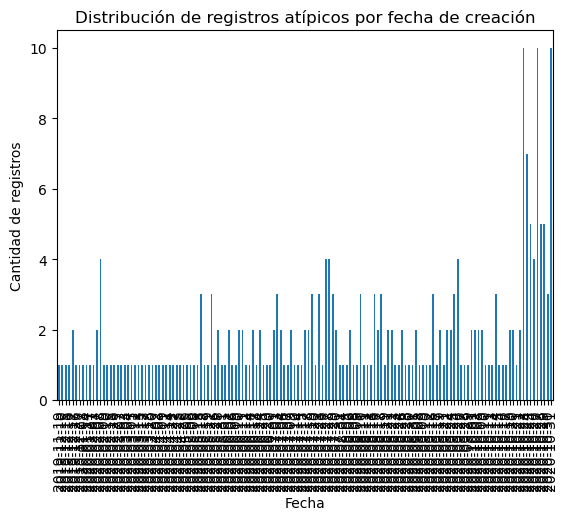

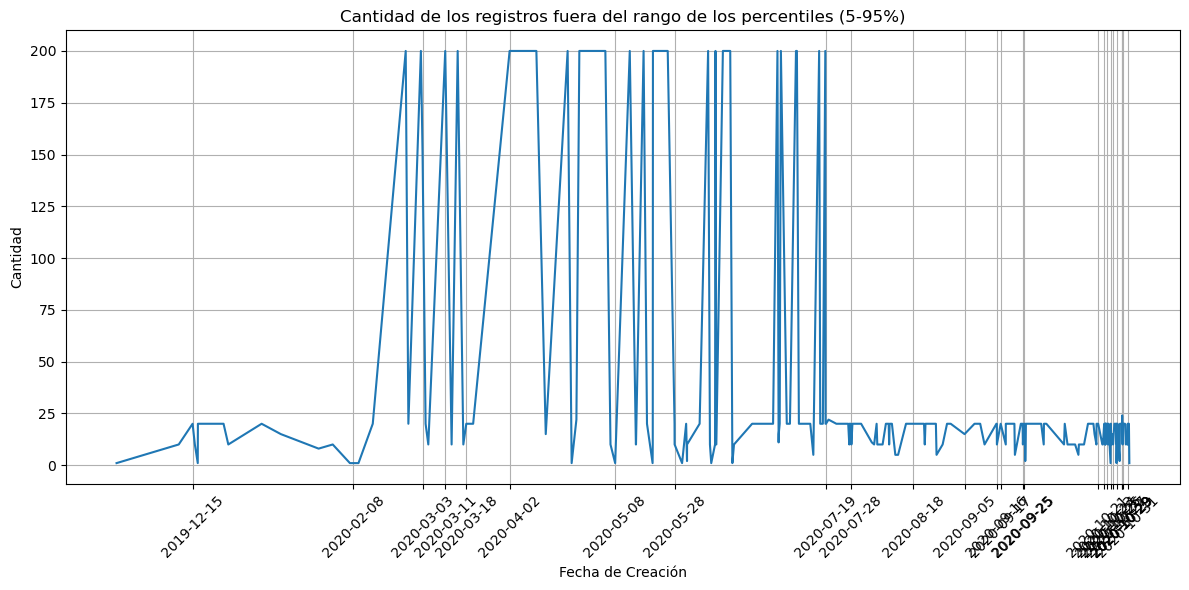

In [153]:
# Ver distribución de fechas de creación
# Usar .loc para modificar de forma segura
outliers_percentiles.loc[:, 'created_at'] = pd.to_datetime(outliers_percentiles['created_at'])

#outliers_percentiles['created_at'] = pd.to_datetime(outliers_percentiles['created_at'])
outliers_percentiles.groupby(outliers_percentiles['created_at'].dt.date)['amount'].count().plot(kind='bar')
plt.title('Distribución de registros atípicos por fecha de creación')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de registros')
plt.show()


plt.figure(figsize=(12, 6))
sns.lineplot(x='created_at', y='amount', data=outliers_percentiles)

# Ajustar etiquetas del eje x
plt.xticks(outliers_percentiles['created_at'][::10], rotation=45)  # Muestra solo cada 10ª fecha
plt.title('Cantidad de los registros fuera del rango de los percentiles (5-95%)')
plt.xlabel('Fecha de Creación')
plt.ylabel('Cantidad')
plt.grid(True)
plt.tight_layout()
plt.show()


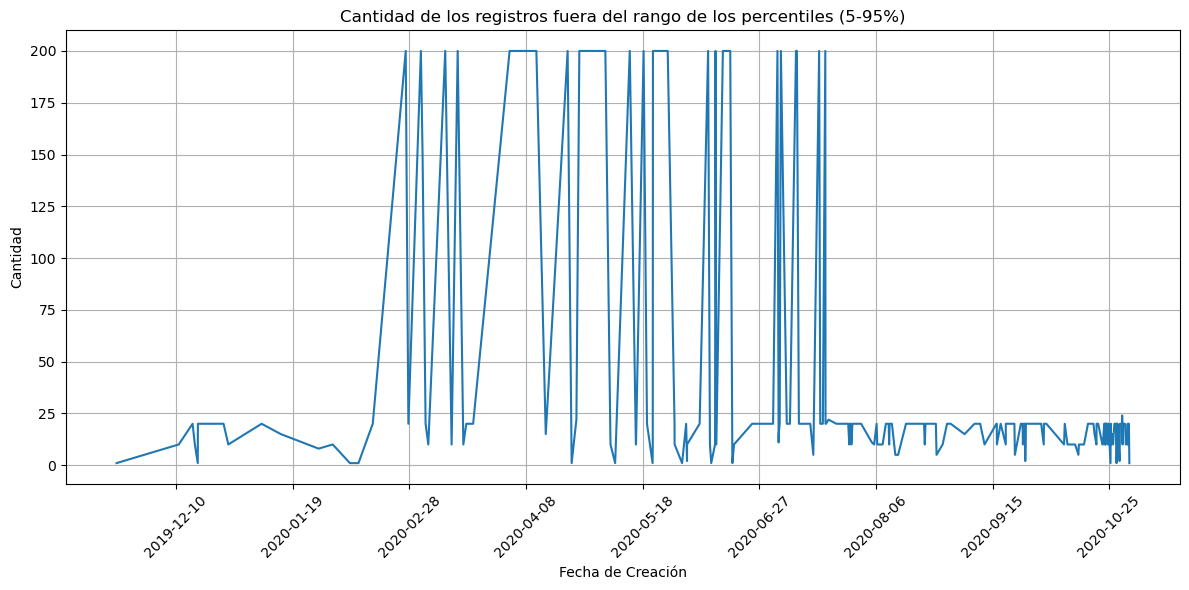

In [157]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

plt.figure(figsize=(12, 6))
sns.lineplot(x='created_at', y='amount', data=outliers_percentiles)

# Ajustar el eje X para controlar la cantidad de etiquetas
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=10))  # Controla el número de fechas mostradas
plt.xticks(rotation=45)  # Rotar las etiquetas para evitar solapamientos
plt.title('Cantidad de los registros fuera del rango de los percentiles (5-95%)')
plt.xlabel('Fecha de Creación')
plt.ylabel('Cantidad')
plt.grid(True)
plt.tight_layout()
plt.show()



In [4]:
print(datos['created_at'].min(), datos['created_at'].max())

2019-11-19 13:57:53.511561+00:00 2020-11-01 23:42:30.847066+00:00


In [5]:
'''
Dado que ambas columnas están relacionadas y complementan información sobre fechas clave del reembolso, 
podriamos combinarlas en una sola columna para simplificar el análisis.
'''
datos['final_reimbursement_date'] = datos.apply(
    lambda row: row['money_back_date'] if pd.notna(row['money_back_date']) else row['reimbursement_date'],
    axis=1
)

In [98]:

#imputación estratégica:creo que pueden tener relevancia en el análisis, así que imputamos con una nueva categoría ('Desconocido' para categóricos).
#se podrían borrar las columnas si finalmente no aportan nada
'''
datos['deleted_account_id'] = datos['deleted_account_id'].fillna('Desconocido')
datos['reimbursement_date'] = datos['reimbursement_date'].fillna('Desconocido')
datos['recovery_status'] = datos['recovery_status'].fillna('Desconocido')
datos['reco_creation'] = datos['reco_creation'].fillna('Desconocido')
datos['reco_last_update'] = datos['reco_last_update'].fillna('Desconocido')
'''
#columnas con menos nulos

# Porcentaje de valores nulos por columna
nulos = datos.isnull().mean() * 100
print(nulos.sort_values(ascending=False))

# Comprobación de si reimbursement_date y money_back_date son complementarios
reimbursement_no_nulos = datos['reimbursement_date']
money_back_no_nulos = datos['money_back_date']

print("Reimbursement Date (no nulos):")
print(reimbursement_no_nulos)

print("\nMoney Back Date (no nulos):")
print(money_back_no_nulos)

ambas_no_nulas = datos[~datos['reimbursement_date'].isna() & ~datos['money_back_date'].isna()]
ambas_nulas = datos[datos['reimbursement_date'].isna() & datos['money_back_date'].isna()]

print(f"Ambas columnas no nulas: {len(ambas_no_nulas)}")
print(f"Ambas columnas nulas: {len(ambas_nulas)}")

coinciden = datos[~datos['reimbursement_date'].isna() & ~datos['money_back_date'].isna()]
fechas_iguales = (coinciden['reimbursement_date'] == coinciden['money_back_date']).sum()

print(f"Coincidencias exactas: {fechas_iguales}")
print(f"Diferencias: {len(coinciden) - fechas_iguales}")

solo_reimbursement = datos[~datos['reimbursement_date'].isna() & datos['money_back_date'].isna()]
solo_money_back = datos[datos['reimbursement_date'].isna() & ~datos['money_back_date'].isna()]

print(f"Solo reimbursement_date tiene datos: {len(solo_reimbursement)}")
print(f"Solo money_back_date tiene datos: {len(solo_money_back)}")

#Comprobar si deleted_account_id y user_id coinciden cuando deleted_account_id no es nulo

deleted_account_id            91.222361
reimbursement_date            87.275761
reco_last_update              86.107635
reco_creation                 86.107635
recovery_status               86.107635
money_back_date               49.770547
final_reimbursement_date      42.052566
moderated_at                  33.617021
cash_request_received_date    32.044222
send_at                       31.305799
user_id                        8.773467
amount                         0.000000
transfer_type                  0.000000
updated_at                     0.000000
created_at                     0.000000
status                         0.000000
id                             0.000000
dtype: float64
Reimbursement Date (no nulos):
0       2020-01-09 19:05:21.596363+00:00
1       2020-01-09 19:50:12.347780+00:00
2       2020-01-09 19:13:35.825041+00:00
3       2020-01-09 19:16:10.879606+00:00
4                                    NaT
                      ...               
23965                       

In [6]:
#definición de cohortes
#obtenemos la primera fecha de cada usuario, agrupamos por user_id y utilizamos el campo 'created_at'
datos['created_at'] = pd.to_datetime(datos['created_at'])
primer_adelanto = datos.groupby('user_id')['created_at'].min().reset_index()
primer_adelanto.rename(columns={'created_at': 'fecha_primer_adelanto'}, inplace=True)



In [7]:
#asignamos cohorte por mes en una columna 'cohorte_mensual'
primer_adelanto['cohorte_mensual'] = primer_adelanto['fecha_primer_adelanto'].dt.to_period('M')
datos_cohortes = datos.merge(primer_adelanto[['user_id', 'cohorte_mensual']], on='user_id', how='left')
print(datos_cohortes[['user_id', 'created_at', 'cohorte_mensual']].head())

   user_id                       created_at cohorte_mensual
0    804.0 2019-12-10 19:05:21.596873+00:00         2019-12
1    231.0 2019-12-10 19:50:12.347780+00:00         2019-12
2    191.0 2019-12-10 19:13:35.825460+00:00         2019-12
3    761.0 2019-12-10 19:16:10.880172+00:00         2019-12
4   7686.0 2020-05-06 09:59:38.877376+00:00         2020-05


C:\Users\chris\AppData\Local\Temp\ipykernel_27888\4096191557.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  primer_adelanto['cohorte_mensual'] = primer_adelanto['fecha_primer_adelanto'].dt.to_period('M')


In [8]:
#mostrar cohortes únicos
cohortes_unicas = sorted(datos_cohortes['cohorte_mensual'].unique())
print(cohortes_unicas)
#vemos que las fechas están dentro del máximo y mínimo de la comprobación anterior min 2019-11 - max 2020-11

[Period('2019-11', 'M'), Period('2019-12', 'M'), Period('2020-05', 'M'), Period('2020-06', 'M'), NaT, Period('2020-01', 'M'), Period('2020-02', 'M'), Period('2020-03', 'M'), Period('2020-04', 'M'), Period('2020-07', 'M'), Period('2020-08', 'M'), Period('2020-09', 'M'), Period('2020-10', 'M'), Period('2020-11', 'M')]


In [9]:
#Una vez definidos los cohortes, podemos comenzar a analizarlos
#Frecuencia de uso
frecuencia_uso_mensual = datos_cohortes.groupby('cohorte_mensual')['user_id'].count().reset_index()
frecuencia_uso_mensual.rename(columns={'user_id': 'frecuencia_uso'}, inplace=True)
print(frecuencia_uso_mensual)



   cohorte_mensual  frecuencia_uso
0          2019-11               8
1          2019-12             893
2          2020-01             321
3          2020-02             423
4          2020-03             323
5          2020-04             840
6          2020-05            1449
7          2020-06            4711
8          2020-07            3735
9          2020-08            1510
10         2020-09            2636
11         2020-10            4943
12         2020-11              75


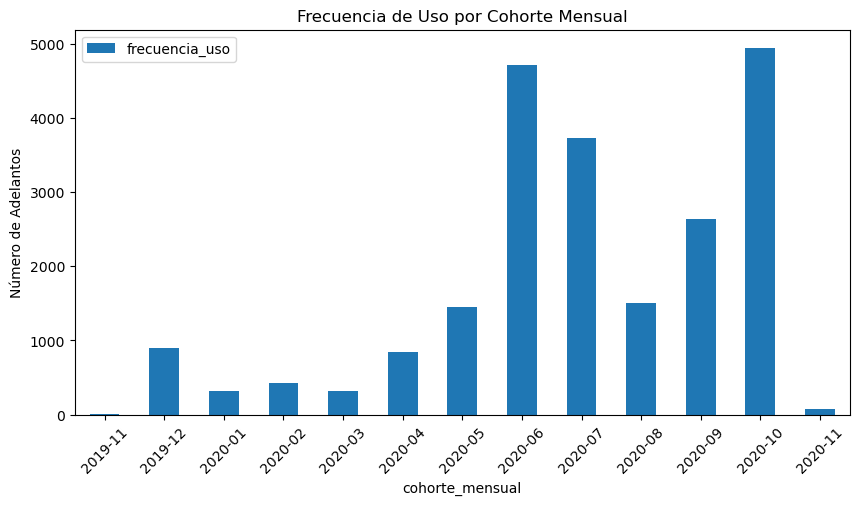

In [10]:
#graficamos
import matplotlib.pyplot as plt
frecuencia_uso_mensual.plot(x='cohorte_mensual', y='frecuencia_uso', kind='bar', figsize=(10, 5))
plt.title('Frecuencia de Uso por Cohorte Mensual')
plt.ylabel('Número de Adelantos')
plt.xlabel('cohorte_mensual')
plt.xticks(rotation=45)
plt.show()

In [11]:
#tasa de incidentes mensuales
incidentes = datos_cohortes[datos_cohortes['status'].isin(['transaction_declined', 'direct_debit_rejected'])]
tasa_incidentes_mensuales = incidentes.groupby('cohorte_mensual')['user_id'].count() / datos_cohortes.groupby('cohorte_mensual')['user_id'].count()
tasa_incidentes_mensuales = tasa_incidentes_mensuales.reset_index()
tasa_incidentes_mensuales.columns = ['cohorte_mensual', 'tasa_incidentes_mensuales']  # Renombrar columnas
print(tasa_incidentes_mensuales)
#en el cohorte 2019-11 hay una tasa de incidentes nan

   cohorte_mensual  tasa_incidentes_mensuales
0          2019-11                        NaN
1          2019-12                   0.044793
2          2020-01                   0.034268
3          2020-02                   0.021277
4          2020-03                   0.012384
5          2020-04                   0.040476
6          2020-05                   0.026225
7          2020-06                   0.026958
8          2020-07                   0.036680
9          2020-08                   0.029139
10         2020-09                   0.045903
11         2020-10                   0.059680
12         2020-11                   0.040000


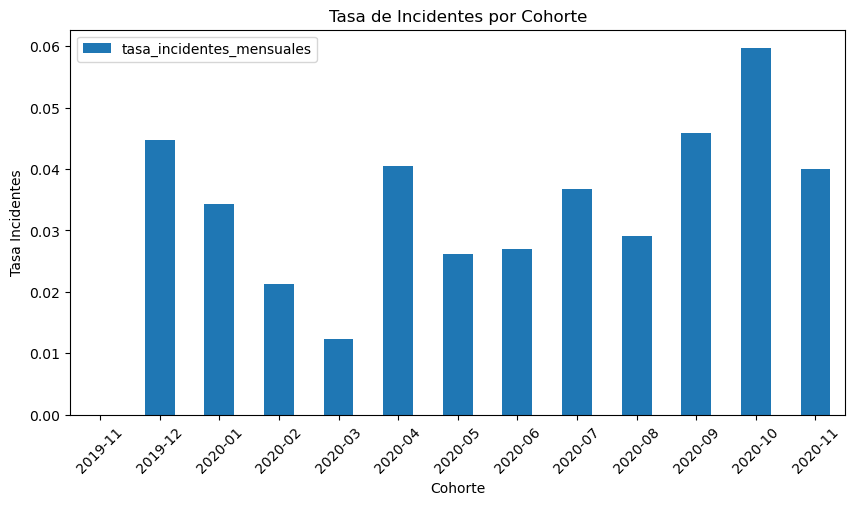

In [12]:
#graficamos
import matplotlib.pyplot as plt
tasa_incidentes_mensuales.plot(x='cohorte_mensual', y='tasa_incidentes_mensuales', kind='bar', figsize=(10, 5))
plt.title('Tasa de Incidentes por Cohorte')
plt.ylabel('Tasa Incidentes')
plt.xlabel('Cohorte')
plt.xticks(rotation=45)
plt.show()

In [13]:
#ingresos generados por cohorte
ingresos_mensuales = datos_cohortes.groupby('cohorte_mensual')['amount'].sum().reset_index()
ingresos_mensuales.rename(columns={'amount': 'ingresos_totales'}, inplace=True)
print(ingresos_mensuales)

   cohorte_mensual  ingresos_totales
0          2019-11             232.0
1          2019-12           84781.0
2          2020-01           31104.0
3          2020-02           39777.0
4          2020-03           31555.0
5          2020-04           79244.0
6          2020-05          134658.0
7          2020-06          425531.0
8          2020-07          320877.0
9          2020-08          116750.0
10         2020-09          196767.0
11         2020-10          340030.0
12         2020-11            5810.0


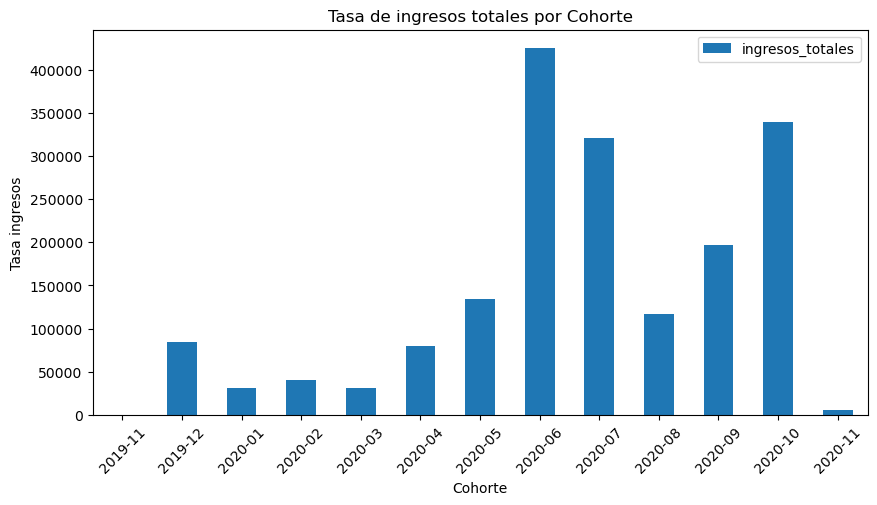

In [14]:
#graficamos
import matplotlib.pyplot as plt
ingresos_mensuales.plot(x='cohorte_mensual', y='ingresos_totales', kind='bar', figsize=(10, 5))
plt.title('Tasa de ingresos totales por Cohorte')
plt.ylabel('Tasa ingresos')
plt.xlabel('Cohorte')
plt.xticks(rotation=45)
plt.show()

In [15]:
# Convertir la cohorte mensual a tipo datetime para convertirla en trimestral
datos_cohortes['fecha_primer_adelanto'] = datos_cohortes['cohorte_mensual'].dt.to_timestamp()

# Convertir a cohorte trimestral
datos_cohortes['cohorte_trimestral'] = datos_cohortes['fecha_primer_adelanto'].dt.to_period('Q')

# Verificar las cohortes trimestrales
cohortes_trimestrales = datos_cohortes[['user_id', 'cohorte_mensual', 'cohorte_trimestral']].drop_duplicates()
print(cohortes_trimestrales)


        user_id cohorte_mensual cohorte_trimestral
0         804.0         2019-12             2019Q4
1         231.0         2019-12             2019Q4
2         191.0         2019-12             2019Q4
3         761.0         2019-12             2019Q4
4        7686.0         2020-05             2020Q2
...         ...             ...                ...
23961   57130.0         2020-09             2020Q3
23962  102737.0         2020-11             2020Q4
23963   31413.0         2020-07             2020Q3
23967   82122.0         2020-10             2020Q4
23968   64517.0         2020-10             2020Q4

[10799 rows x 3 columns]


In [84]:
#Frecuencia de uso trimestral
frecuencia_uso_trimestral = cohortes_trimestrales.groupby('cohorte_trimestral')['user_id'].count().reset_index()
frecuencia_uso_trimestral.rename(columns={'user_id': 'frecuencia_uso_trimestral'}, inplace=True)
print(frecuencia_uso_trimestral.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype        
---  ------                     --------------  -----        
 0   cohorte_trimestral         5 non-null      period[Q-DEC]
 1   frecuencia_uso_trimestral  5 non-null      int64        
dtypes: int64(1), period[Q-DEC](1)
memory usage: 212.0 bytes
None


In [74]:
#Convertimos las columnas de cohortes a datetime para poder graficar
frecuencia_uso_trimestral['cohorte_trimestral'] = frecuencia_uso_trimestral['cohorte_trimestral'].dt.to_timestamp()
frecuencia_uso_mensual['cohorte_mensual'] = frecuencia_uso_mensual['cohorte_mensual'].dt.to_timestamp()

In [78]:
print(frecuencia_uso_trimestral.info())
print(frecuencia_uso_mensual.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   cohorte_trimestral         5 non-null      datetime64[ns]
 1   frecuencia_uso_trimestral  5 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 212.0 bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   cohorte_mensual  13 non-null     datetime64[ns]
 1   frecuencia_uso   13 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 340.0 bytes
None


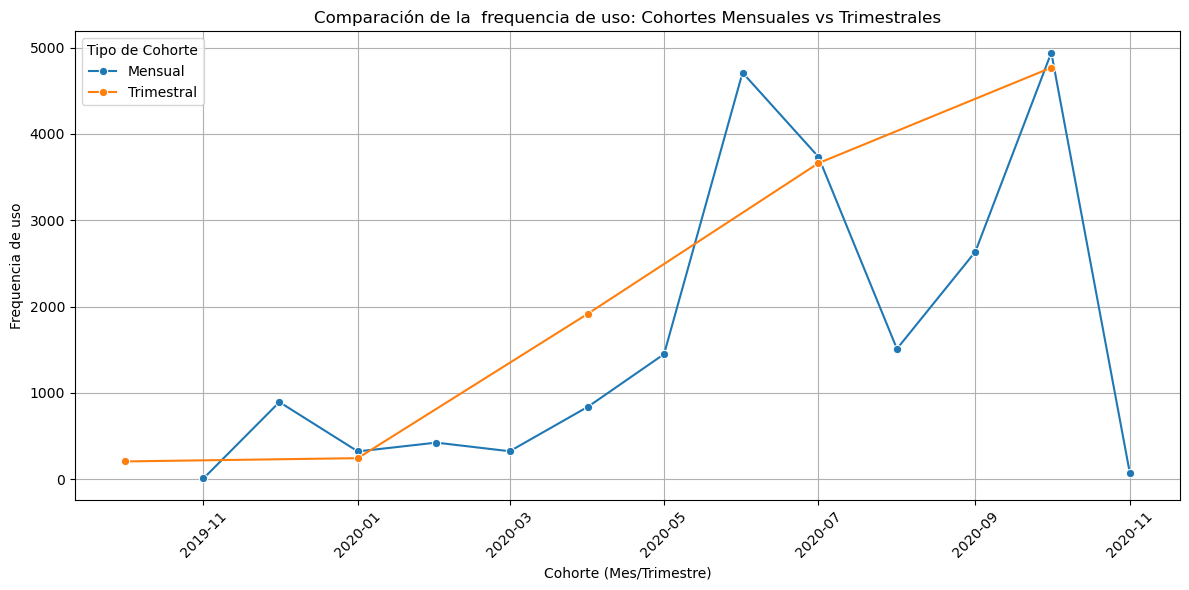

In [82]:
#graficamos frequencia de uso mensual vs trimestral
plt.figure(figsize=(12, 6))
sns.lineplot(x='cohorte_mensual', y='frecuencia_uso', data=frecuencia_uso_mensual, label='Mensual', marker='o')
sns.lineplot(x='cohorte_trimestral', y='frecuencia_uso_trimestral', data=frecuencia_uso_trimestral, label='Trimestral', marker='o')

# Configuración del gráfico
plt.title('Comparación de la  frequencia de uso: Cohortes Mensuales vs Trimestrales')
plt.xlabel('Cohorte (Mes/Trimestre)')
plt.ylabel('Frequencia de uso')
plt.legend(title='Tipo de Cohorte')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Mostrar gráfico
plt.show()

In [17]:
#tasa incidentes trimestrales:
#Es 'canceled' una incidencia?
incidentes_trimestrales = cohortes_trimestrales[datos_cohortes['status'].isin(['transaction_declined', 'direct_debit_rejected'])]
tasa_incidentes_trimestrales = incidentes_trimestrales.groupby('cohorte_trimestral')['user_id'].count() / datos_cohortes.groupby('cohorte_trimestral')['user_id'].count()
tasa_incidentes_trimestrales = tasa_incidentes_trimestrales.reset_index()
tasa_incidentes_trimestrales.columns = ['cohorte_trimestral', 'tasa_incidentes_trimestrales']  # Renombrar columnas
print(tasa_incidentes_trimestrales)

  cohorte_trimestral  tasa_incidentes_trimestrales
0             2019Q4                      0.016648
1             2020Q1                      0.011246
2             2020Q2                      0.011857
3             2020Q3                      0.023855
4             2020Q4                      0.053607


C:\Users\chris\AppData\Local\Temp\ipykernel_27888\1433028658.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  incidentes_trimestrales = cohortes_trimestrales[datos_cohortes['status'].isin(['transaction_declined', 'direct_debit_rejected'])]


In [18]:
#ingresos generados por cohorte trimestral cohortes_trimestrales
ingresos_trimestrales = datos_cohortes.groupby('cohorte_trimestral')['amount'].sum().reset_index()
ingresos_trimestrales.rename(columns={'amount': 'ingresos_totales_trimestrales'}, inplace=True)
print(ingresos_trimestrales)

  cohorte_trimestral  ingresos_totales_trimestrales
0             2019Q4                        85013.0
1             2020Q1                       102436.0
2             2020Q2                       639433.0
3             2020Q3                       634394.0
4             2020Q4                       345840.0


In [86]:
#Convertimos las columnas de cohortes a datetime para poder graficar
ingresos_mensuales['cohorte_mensual'] = ingresos_mensuales['cohorte_mensual'].dt.to_timestamp()


KeyError: 'cohorte_trimestral'

In [90]:
ingresos_trimestrales['cohorte_trimestral'] = ingresos_trimestrales['cohorte_trimestral'].dt.to_timestamp()

In [92]:
ingresos_mensuales.info()
ingresos_trimestrales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   cohorte_mensual   13 non-null     datetime64[ns]
 1   ingresos_totales  13 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 340.0 bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   cohorte_trimestral             5 non-null      datetime64[ns]
 1   ingresos_totales_trimestrales  5 non-null      float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 212.0 bytes


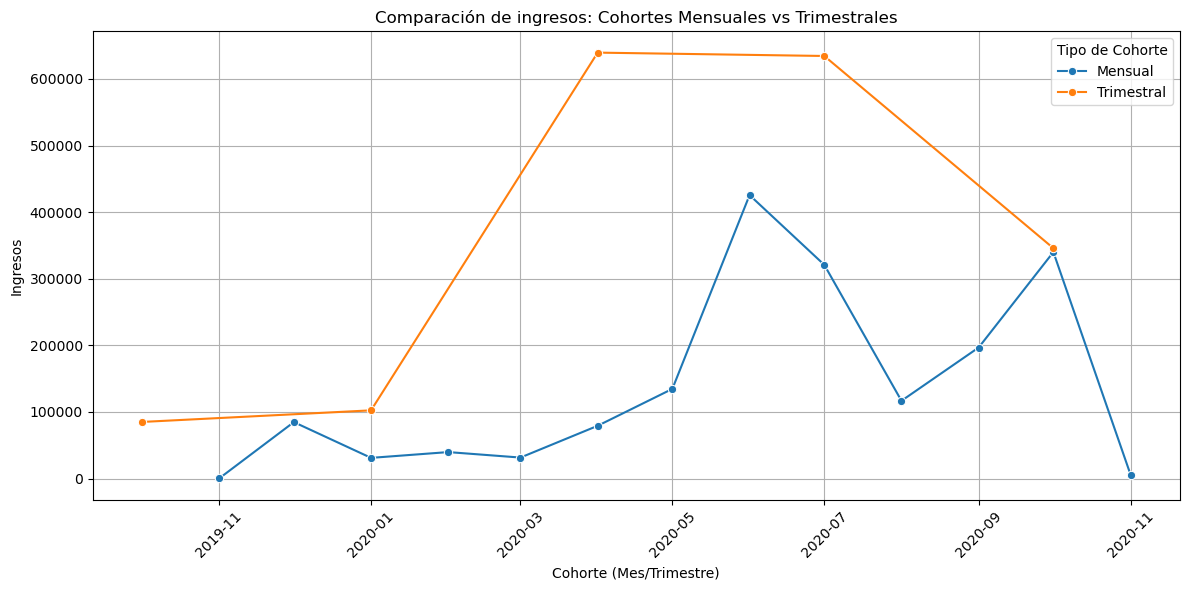

In [96]:
#graficamos ingresos mensual vs trimestral
plt.figure(figsize=(12, 6))
sns.lineplot(x='cohorte_mensual', y='ingresos_totales', data=ingresos_mensuales, label='Mensual', marker='o')
sns.lineplot(x='cohorte_trimestral', y='ingresos_totales_trimestrales', data=ingresos_trimestrales, label='Trimestral', marker='o')

# Configuración del gráfico
plt.title('Comparación de ingresos: Cohortes Mensuales vs Trimestrales')
plt.xlabel('Cohorte (Mes/Trimestre)')
plt.ylabel('Ingresos')
plt.legend(title='Tipo de Cohorte')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Mostrar gráfico
plt.show()

In [52]:
#Convertimos las columnas de cohortes a datetime para poder graficar
tasa_incidentes_mensuales = tasa_incidentes_mensuales.dropna()
tasa_incidentes_mensuales['cohorte_mensual'] = tasa_incidentes_mensuales['cohorte_mensual'].dt.to_timestamp()

AttributeError: 'DatetimeProperties' object has no attribute 'to_timestamp'

In [56]:
print(tasa_incidentes_mensuales.info())

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 1 to 12
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   cohorte_mensual            12 non-null     datetime64[ns]
 1   tasa_incidentes_mensuales  12 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 288.0 bytes
None


In [58]:
#Convertimos las columnas de cohortes a datetime para poder graficar
tasa_incidentes_trimestrales['cohorte_trimestral'] = tasa_incidentes_trimestrales['cohorte_trimestral'].dt.to_timestamp()

In [60]:
print(tasa_incidentes_trimestrales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   cohorte_trimestral            5 non-null      datetime64[ns]
 1   tasa_incidentes_trimestrales  5 non-null      float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 212.0 bytes
None


In [66]:
'''plt.figure(figsize=(12, 6))
sns.lineplot(x='cohorte_mensual', y='tasa_incidentes_mensuales', data=tasa_incidentes_mensuales, label='Mensual', marker='o')
plt.title('Tasa de Incidentes Mensuales')
plt.xlabel('Cohorte Mensual')
plt.ylabel('Tasa de Incidentes')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
'''

"plt.figure(figsize=(12, 6))\nsns.lineplot(x='cohorte_mensual', y='tasa_incidentes_mensuales', data=tasa_incidentes_mensuales, label='Mensual', marker='o')\nplt.title('Tasa de Incidentes Mensuales')\nplt.xlabel('Cohorte Mensual')\nplt.ylabel('Tasa de Incidentes')\nplt.xticks(rotation=45)\nplt.grid(True)\nplt.tight_layout()\nplt.show()\n"

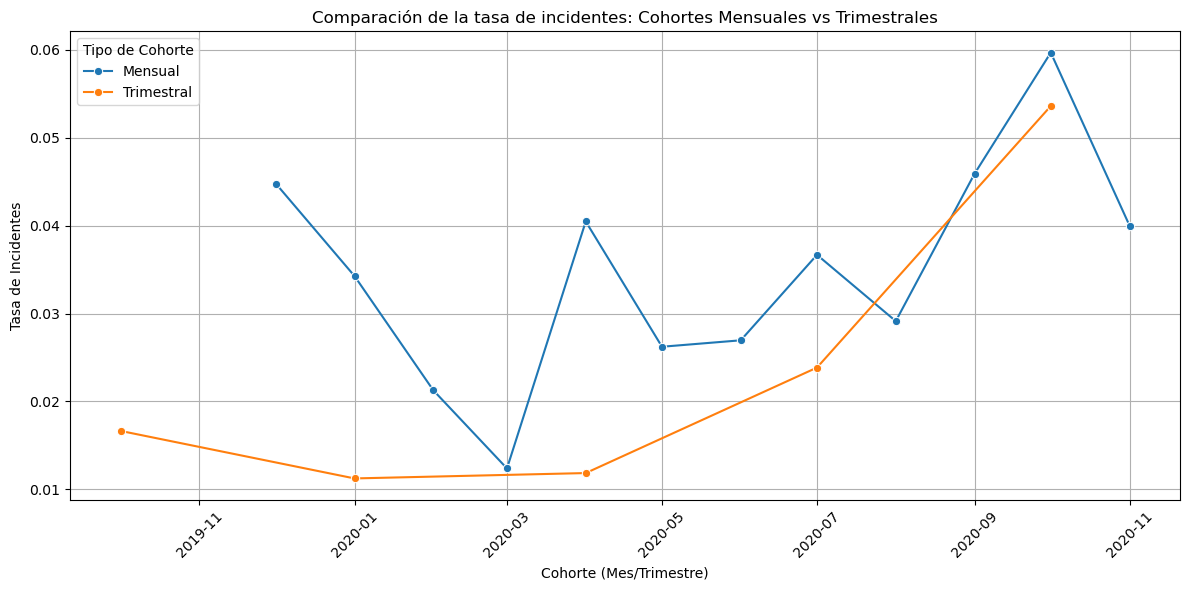

In [64]:
#graficamos tasa incidentes mensual vs trimestral
plt.figure(figsize=(12, 6))
sns.lineplot(x='cohorte_mensual', y='tasa_incidentes_mensuales', data=tasa_incidentes_mensuales, label='Mensual', marker='o')
sns.lineplot(x='cohorte_trimestral', y='tasa_incidentes_trimestrales', data=tasa_incidentes_trimestrales, label='Trimestral', marker='o')

# Configuración del gráfico
plt.title('Comparación de la tasa de incidentes: Cohortes Mensuales vs Trimestrales')
plt.xlabel('Cohorte (Mes/Trimestre)')
plt.ylabel('Tasa de Incidentes')
plt.legend(title='Tipo de Cohorte')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Mostrar gráfico
plt.show()


In [ ]:
#Métricas acumuladas
#Tasa acumulada de incidentes


In [106]:
# archivo extractfees.csv
ruta_archivo = './extractfees.csv'
datos = pd.read_csv(ruta_archivo)
# Muestra información básica sobre el DataFrame
print(datos.info())
# Estadísticas descriptivas iniciales para columnas numéricas
print(datos.describe())
# Lista de columnas del DataFrame
print(datos.columns)
# Muestra las primeras y últimas filas para inspección inicial
#print(datos.head())
#print(datos.tail())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB
None
                 id  cash_request_id  total_amount
count  21061.000000     21057.000000  21061.000000
mean   10645.355111     16318.4